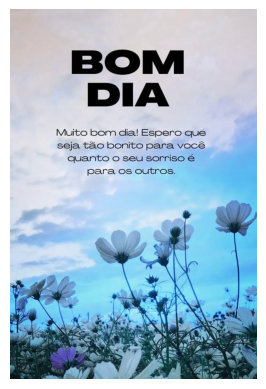

In [13]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

image = cv2.imread('data/bom-dia.jpeg')

plt.imshow(image)
plt.axis('off')
plt.show()


In [18]:
text = pytesseract.image_to_string(image, lang='por')
print(image) # Images in RGB have three channels, thus a complex matrix structure
print(text)

[[[193 181 177]
  [194 182 178]
  [194 182 178]
  ...
  [210 204 209]
  [210 204 209]
  [210 204 209]]

 [[194 182 178]
  [194 182 178]
  [194 182 178]
  ...
  [210 204 209]
  [211 205 210]
  [211 205 210]]

 [[194 182 178]
  [194 182 178]
  [193 182 178]
  ...
  [211 205 210]
  [211 205 210]
  [212 206 211]]

 ...

 [[  5  21  20]
  [  5  21  20]
  [  6  22  21]
  ...
  [ 14  35  36]
  [ 16  37  38]
  [ 11  32  33]]

 [[  4  20  19]
  [  5  21  20]
  [  5  21  20]
  ...
  [ 11  32  33]
  [ 16  37  38]
  [ 15  36  37]]

 [[  4  20  19]
  [  5  21  20]
  [  5  21  20]
  ...
  [  9  30  31]
  [ 16  37  38]
  [ 16  37  38]]]
BOM
DIA

Muito bom dia! Espero que
seja tão bonito para você
quanto o seu sorriso é
para os outros.




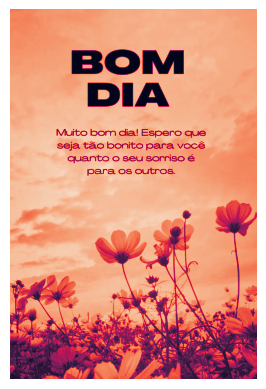

In [30]:
# convert to greayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray)
plt.axis('off')
plt.show()

In [17]:
text = pytesseract.image_to_string(image_gray, lang='por')
print(image_gray) # Images in grayscale have only one channel, thus a simple matrix structure, which helps preprocessing
print("Text: " + text)

[[181 182 182 ... 206 206 206]
 [182 182 182 ... 206 207 207]
 [182 182 182 ... 207 207 208]
 ...
 [ 19  19  20 ...  33  35  30]
 [ 18  19  19 ...  30  35  34]
 [ 18  19  19 ...  28  35  35]]
Text: BOM
DIA

Muito bom dia! Espero que
seja tão bonito para você
quanto o seu sorriso é
para os outros.




Text after preprocessing: 
BOM
DIA

Muito bom dia! Espero que
seja tão bonito para você
quanto o seu sorriso é
para os outros.




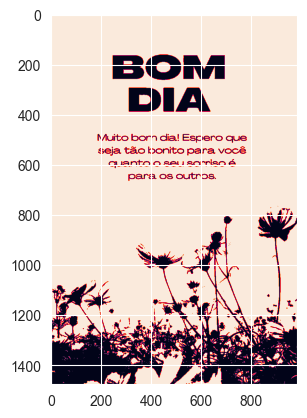

In [21]:
# Applying thresholding technique
_, img_thres = cv2.threshold(image_gray, 142, 255, cv2.THRESH_BINARY)
plt.imshow(img_thres)

# Extract text after preprocessing
text_thresh = pytesseract.image_to_string(img_thres, lang='por')
print("Text after preprocessing: \n" + text_thresh)

Text after preprocessing: 
BOM
DIA

Muito bom dia! Espero que
seja tão bonito para você
quanto o seu sorriso é
para os outros.




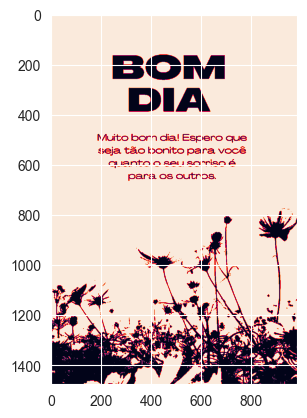

In [39]:
# Otsu method
_, img_otsu = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(img_otsu)

# Extract text after preprocessing
text_otsu = pytesseract.image_to_string(img_otsu, lang='por')
print("Text after preprocessing: \n" + text_otsu)

In [43]:
# adaptive thresholding method
img_adapt_mean = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3)
plt.imshow(img_adapt_mean)

# Extract text after preprocessing
text_adapt_mean = pytesseract.image_to_string(img_adapt_mean, lang='por')
print("Text after preprocessing: \n" + text_adapt_mean)

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'adaptiveThreshold'
> Overload resolution failed:
>  - adaptiveThreshold() missing required argument 'C' (pos 6)
>  - adaptiveThreshold() missing required argument 'C' (pos 6)


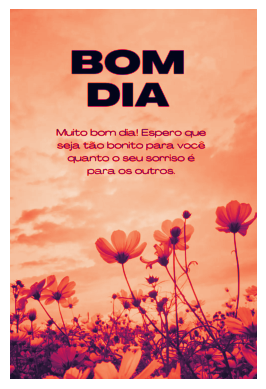

Text after preprocessing: 
BOM
DIA

Muito bom dia! Espero que
seja tão bonito para você
quanto o seu sorriso é
para os outros.




In [41]:
# Bluring the image to remove noise
img_median_blur = cv2.medianBlur(image_gray, 3)
plt.imshow(img_median_blur)
plt.axis('off')
plt.show()

text_median_blur = pytesseract.image_to_string(img_median_blur, lang='por')
print("Text after preprocessing: \n" + text_median_blur)

In [44]:
    ### Text Analysis

from difflib import SequenceMatcher

# Original Text
original_Text = """
BOM
DIA

Muito bom dia! Espero que
seja tão bonito para você
quanto o seu sorriso é
para os outros.
"""

# Variables that contain text to be compared
texto_ocr_variants = {
    "texto_thresh": text_thresh,
    "text_thresh": text_thresh,
    "texto_otsu": text_otsu,
    "texto_median_blur": text_median_blur,
}

def compare_texts(original, ocr_text):
        matcher = SequenceMatcher (None, original, ocr_text)
        match_ratio = matcher.ratio()
        return match_ratio


def main():
        original_len = len(original_Text)
        print(f"Quantiade de caracteres no texto original: {original_len}\n") 
        
        for variant_name, ocr_text in texto_ocr_variants.items():
            ocr_len = len(ocr_text)
            accuracy = compare_texts (original_Text, ocr_text)
            accuracy_percentage = accuracy * 100
            print (f"Resultado para {variant_name}:")
            print(f"Quantidade de caracteres no texto OCR: {ocr_len}")
            print(f"Percentual de acertos: {accuracy_percentage: .2f})%\n")
        

In [45]:
if __name__ == "__main__":
    main()

Quantiade de caracteres no texto original: 101

Resultado para texto_thresh:
Quantidade de caracteres no texto OCR: 101
Percentual de acertos:  99.01)%

Resultado para text_thresh:
Quantidade de caracteres no texto OCR: 101
Percentual de acertos:  99.01)%

Resultado para texto_otsu:
Quantidade de caracteres no texto OCR: 101
Percentual de acertos:  99.01)%

Resultado para texto_median_blur:
Quantidade de caracteres no texto OCR: 101
Percentual de acertos:  99.01)%

